In [1]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from analysis.plot_matplotlib import plot_hist
from analysis.mc import BinnedImportanceSamplingIntegrator
from analysis import tnp, tnp_mode
import pandas as pd

In [2]:
def integrand(args, mode=0):
    return tnp.exp(-(10)*((args[0]-2)**2)*(args[1]-2)**2) + tnp.exp(-(10)*((args[0]-4)**2)*(args[1]-4)**2)

def integrand_2(args, mode=0):
    r1_2 = (args[0]-2)**2 + (args[1]-2)**2
    r2_2 = (args[0]-4)**2 + (args[1]-4)**2
    
    return tnp.exp(-(10)*r1_2) + tnp.exp(-(10)*r2_2)

# 1D example

In [17]:
tnp_mode(1)

namespace(arange=<function torch._VariableFunctionsClass.arange>,
          array=<function torch._VariableFunctionsClass.tensor>,
          prod=<function analysis.tnp.tnp.<lambda>(tensor, axis=0)>,
          trapz=<function torch._VariableFunctionsClass.trapezoid>,
          argsort=<function torch._VariableFunctionsClass.argsort>,
          sum=<function torch._VariableFunctionsClass.sum>,
          exp=<function torch._VariableFunctionsClass.exp>,
          stack=<function torch._VariableFunctionsClass.stack>,
          ones=<function torch._VariableFunctionsClass.ones>,
          zeros=<function torch._VariableFunctionsClass.zeros>,
          random=namespace(choice=<function analysis.tnp.tnp.<lambda>(vals, size)>,
                           uniform=<function analysis.tnp.tnp.<lambda>(low, high)>))

In [18]:
def integrand_1d(args):
    #return -(args[0]-3)**2+5
    #return 1/(args[0]-3)**2
    #return 10*np.exp(-(1/0.01)*(args[0]-3)**2)
    return np.exp(-3*((args[0]-3)**2))

n_tries = 1000
dims = 1
bins_per_dim = 30
boundaries = [
    [0., 6.]
]
instance = BinnedImportanceSamplingIntegrator(bins_per_dim=bins_per_dim, integrand=integrand_1d, dims=dims, boundaries=boundaries)

In [19]:
print(instance.integrate(10000), instance.importance_per_dim(0).sum())

res_raw = []
for i in range(n_tries):
    res_raw.append(instance.integrate(1000))

if tnp_mode():
    res_raw = torch.stack(res_raw).numpy()
    
#plt.hist(res_raw, bins=32)
#plt.title(rf"$I={np.average(res_raw):0.2f}\pm{np.std(res_raw):0.2f}$")

tensor(0.9887) tensor(5.0000)


(array([0.16195129, 0.16225128, 0.16970135, 0.16935132, 0.1729514 ,
        0.1722014 , 0.16840126, 0.16890137, 0.16815136, 0.16665125,
        0.16160131, 0.1598013 , 0.16925137, 0.16760136, 0.16250112,
        0.17000138, 0.16505134, 0.16655135, 0.16635135, 0.16535134,
        0.16865137, 0.16595135, 0.16745136, 0.16205093, 0.16910137,
        0.16470134, 0.17010138, 0.16860137, 0.16440133, 0.16445133]),
 array([4.13179405e-05, 2.00039729e-01, 4.00038153e-01, 6.00036561e-01,
        8.00035000e-01, 1.00003338e+00, 1.20003176e+00, 1.40003026e+00,
        1.60002863e+00, 1.80002701e+00, 2.00002551e+00, 2.20002389e+00,
        2.40002227e+00, 2.60002065e+00, 2.80001903e+00, 3.00001764e+00,
        3.20001602e+00, 3.40001440e+00, 3.60001278e+00, 3.80001116e+00,
        4.00000954e+00, 4.20000792e+00, 4.40000629e+00, 4.60000467e+00,
        4.80000353e+00, 5.00000191e+00, 5.20000029e+00, 5.39999866e+00,
        5.59999704e+00, 5.79999542e+00, 5.99999380e+00]),
 <BarContainer object of 30 

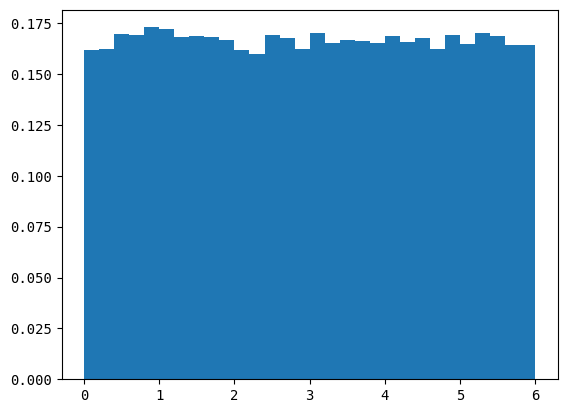

In [20]:
n_samples = 100000
samples = instance.sample(n_samples)
plt.hist(samples[0], density=True, bins=bins_per_dim)
# sns.scatterplot(x=samples[0], y=integrand(samples))

In [21]:
instance.adapt()

(array([0.01520259, 0.01300222, 0.01590271, 0.01370234, 0.01310224,
        0.0164528 , 0.01355232, 0.01555266, 0.01455249, 0.01330226,
        0.01455248, 0.19403326, 0.46027835, 0.74742724, 0.94641224,
        0.93665945, 0.73642624, 0.46002831, 0.20178435, 0.01490255,
        0.01350228, 0.01425246, 0.01475251, 0.01305222, 0.01390237,
        0.01520259, 0.01590271, 0.01315227, 0.01455248, 0.01575268]),
 array([3.91831163e-05, 2.00005054e-01, 3.99970919e-01, 5.99936783e-01,
        7.99902678e-01, 9.99868512e-01, 1.19983447e+00, 1.39980030e+00,
        1.59976614e+00, 1.79973197e+00, 1.99969792e+00, 2.19966388e+00,
        2.39962959e+00, 2.59959555e+00, 2.79956150e+00, 2.99952722e+00,
        3.19949317e+00, 3.39945889e+00, 3.59942484e+00, 3.79939079e+00,
        3.99935651e+00, 4.19932270e+00, 4.39928818e+00, 4.59925413e+00,
        4.79922009e+00, 4.99918604e+00, 5.19915199e+00, 5.39911795e+00,
        5.59908342e+00, 5.79904938e+00, 5.99901533e+00]),
 <BarContainer object of 30 

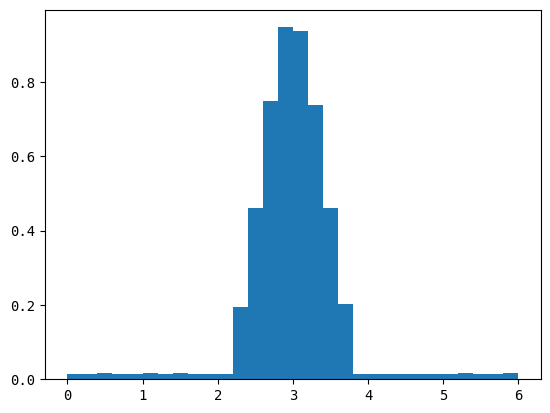

In [22]:
samples = instance.sample(n_samples)
plt.hist(samples[0], density=True, bins=bins_per_dim)
# sns.scatterplot(x=samples[0], y=integrand(samples))

In [23]:
print(instance.integrate(10000), instance.importance_per_dim(0).sum())

res_final = []
for i in range(n_tries):
    res_final.append(instance.integrate(1000))

if tnp_mode():
    res_final = torch.stack(res_final).numpy()

tensor(1.0111) tensor(20.5309)


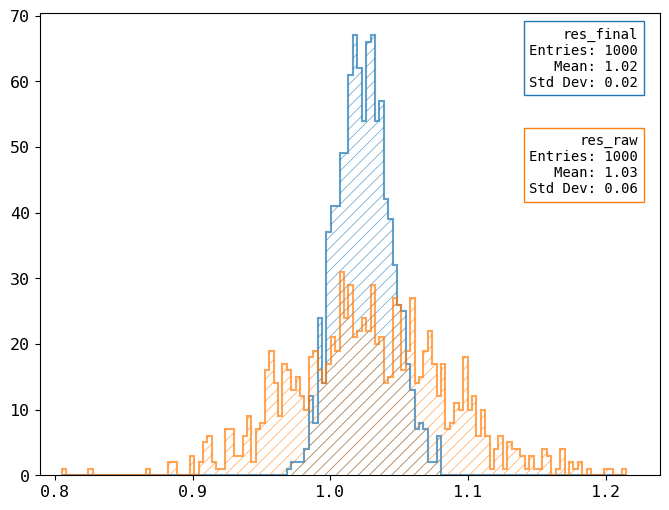

In [24]:
plot_hist(pd.DataFrame(dict(res_final=res_final, res_raw=res_raw)))

In [ ]:
plot_hist(pd.DataFrame(dict(res_final=res_final, res_raw=res_raw)))

# 2D example

In [7]:
tnp_mode(1)

namespace(arange=<function torch._VariableFunctionsClass.arange>,
          array=<function torch._VariableFunctionsClass.tensor>,
          prod=<function analysis.tnp.tnp.<lambda>(tensor, axis=0)>,
          trapz=<function torch._VariableFunctionsClass.trapezoid>,
          argsort=<function torch._VariableFunctionsClass.argsort>,
          sum=<function torch._VariableFunctionsClass.sum>,
          exp=<function torch._VariableFunctionsClass.exp>,
          stack=<function torch._VariableFunctionsClass.stack>,
          random=namespace(choice=<function analysis.tnp.tnp.<lambda>(vals, size)>,
                           uniform=<function analysis.tnp.tnp.<lambda>(low, high)>))

In [27]:
n_tries = 1000
dims = 2
bins_per_dim = 30
boundaries = [
    [0., 6.],
    [0., 6.]
]
instance = BinnedImportanceSamplingIntegrator(bins_per_dim, integrand_2, dims, boundaries, mode=1)

In [28]:
res_raw = []
for i in range(n_tries):
    res_raw.append(instance.integrate(1000))

if tnp_mode():
    res_raw = torch.stack(res_raw).numpy()

In [29]:
instance.integrate(10000)

tensor(0.6606)

(array([[0.025501  , 0.02875112, 0.03000117, 0.02375093, 0.02750108,
         0.02150084, 0.02775109, 0.02625103, 0.02875112, 0.02375093,
         0.03025118, 0.02425095, 0.02650104, 0.02175085, 0.02675105,
         0.03150123, 0.02850111, 0.02625103, 0.02850111, 0.02950115,
         0.02775109, 0.02525099, 0.02900113, 0.03000117, 0.02725107,
         0.02700106, 0.0307512 , 0.02700106, 0.02675105, 0.02625103],
        [0.0280011 , 0.02775109, 0.02950115, 0.03000117, 0.0282511 ,
         0.02775109, 0.02475097, 0.02175085, 0.02875112, 0.02650104,
         0.02900113, 0.02475097, 0.03225126, 0.03400133, 0.02900113,
         0.02750108, 0.03275128, 0.02950115, 0.0307512 , 0.02600102,
         0.02775109, 0.02700106, 0.02750108, 0.025501  , 0.03275128,
         0.02350092, 0.02950115, 0.02325091, 0.02775109, 0.02775109],
        [0.02675105, 0.02400094, 0.02700106, 0.02125083, 0.03125122,
         0.03050119, 0.02750108, 0.03100121, 0.03125122, 0.02700106,
         0.02750108, 0.02575101,

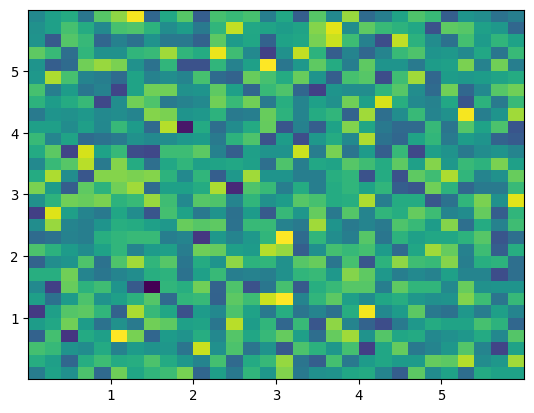

In [30]:
n_samples = 100000
samples = instance.sample(n_samples)
if tnp_mode():
    samples = samples.numpy()

plt.hist2d(samples[0], samples[1], density=True, bins=bins_per_dim)
# sns.scatterplot(x=samples[0], y=integrand(samples))

In [31]:
instance.adapt(n_samples)

(array([[0.00251149, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.01255745, 0.02009191,
         0.02009191, 0.00753447, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.01004596, 0.01255745,
         0.01004596, 0.00251149, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.00251149, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.00251149, 0.01255745,
         0.01506893, 0.00502298, 0.        , 0.00251149, 0.        ,
         0.        , 0.        , 0.00251149, 0.00753447, 0.0226034 ,
         0.01004596, 0.        , 0.00251149, 0.        , 0.00251149,
         0.        , 0.00251149, 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.02009191,
         0.00502298, 0.00502298,

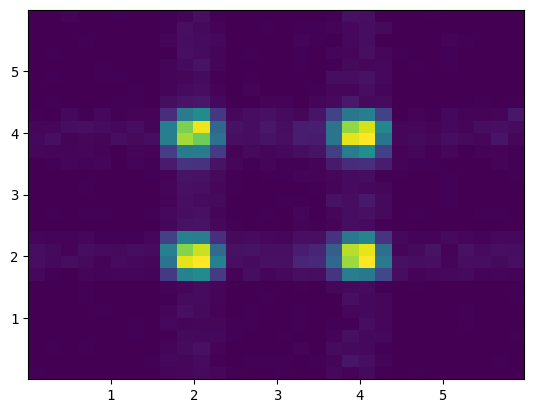

In [32]:
n_samples = 10000
samples = instance.sample(n_samples)
if tnp_mode():
    samples = samples.numpy()

plt.hist2d(samples[0], samples[1], density=True, bins=bins_per_dim)

In [14]:
a = torch.tensor([
    [0.1, 0.2],
    [0.3, 0.5]
])
b = a.numpy()

In [33]:
res_final = []
for i in range(n_tries):
    res_final.append(instance.integrate(1000))

In [34]:
res_final = np.array(res_final)
res_raw = np.array(res_raw)

len(res_final), len(res_raw)

(1000, 1000)

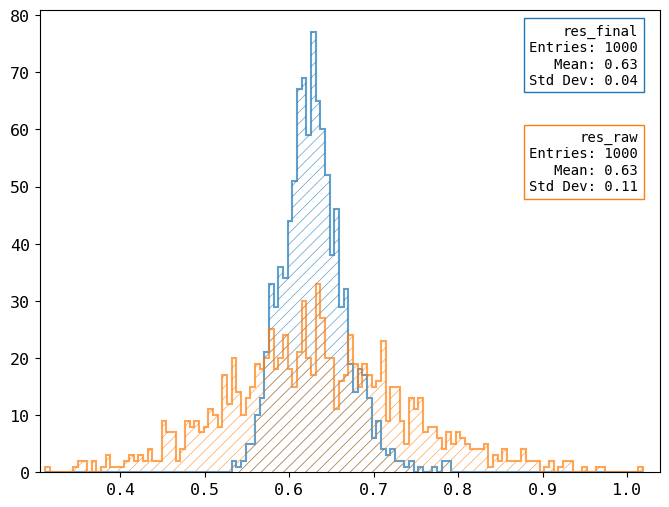

In [35]:
plot_hist(pd.DataFrame(dict(res_final=res_final, res_raw=res_raw)))

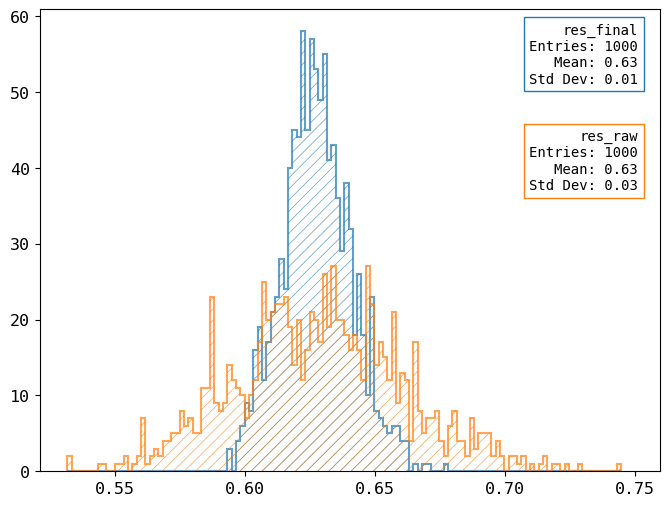

In [51]:
plot_hist(pd.DataFrame(dict(res_final=res_final, res_raw=res_raw)))

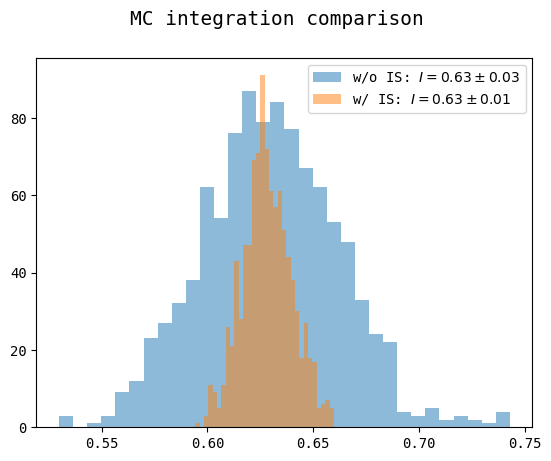

In [61]:
fig, ax = plt.subplots()

fig.suptitle('MC integration comparison', fontsize=14)
ax.hist(res_raw, bins=32, alpha = 0.5, label=rf"w/o IS: $I={np.average(res_raw):0.2f}\pm{np.std(res_raw):0.2f}$")
ax.hist(res_final, bins=32, alpha=0.5, label=rf"w/ IS: $I={np.average(res_final):0.2f}\pm{np.std(res_final):0.2f}$")
ax.legend(loc="upper right")

In [62]:
instance.boundaries

[[0.0, 6.0], [0.0, 6.0]]

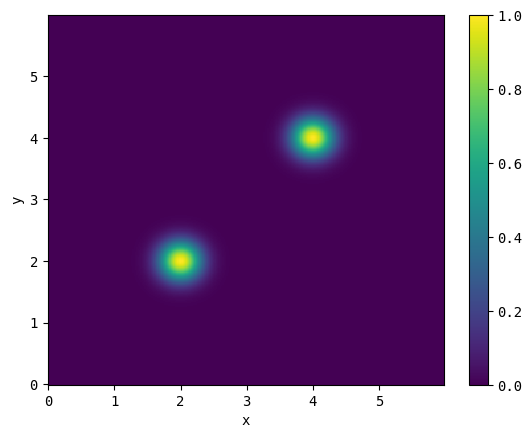

In [52]:
def integrand_2(args, mode=0):
    #return -(args[0]-3)**2+5
    #return 1/(args[0]-3)**2
    #return 10*np.exp(-(1/0.01)*(args[0]-3)**2)
    r1_2 = (args[0]-2)**2 + (args[1]-2)**2
    r2_2 = (args[0]-4)**2 + (args[1]-4)**2
    
    return tnp.exp(-(10)*r1_2) + tnp.exp(-(10)*r2_2)

x = np.arange(instance.boundaries[0][0], instance.boundaries[0][1], 0.02)
y = np.arange(instance.boundaries[1][0], instance.boundaries[1][1], 0.02)
args = np.meshgrid(x, y)
z = integrand_2(args)

plt.pcolormesh(x, y, z)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()